Architecture of a classification model
1. Input layer shape - Same as number of features.
2. Hidden shape - Problem specific(minimum-1 and maximum-unlimited)
3. Neurons per hidden layer - Problem specific, generally 10 to 100
4. Output layer shape - 1(for binary) / 1 per class
5. Hidden activation - usually ReLU(can try linear)
6. Output activation - Sigmoid(for binary classification) / Softmax(for multiclass)
7. Loss function - Cross entropy / categorical cross entropy
8. Optimizer - SGD, Adam

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_circles
n_samples=1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [6]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

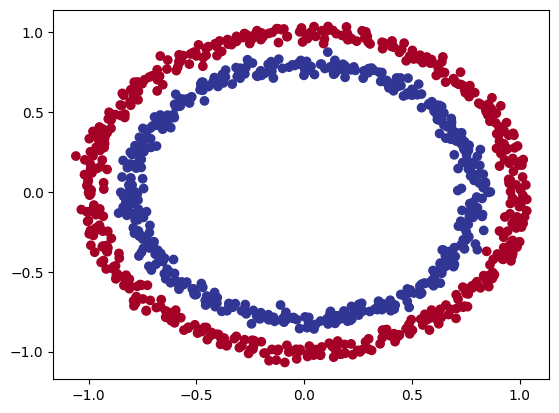

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [8]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 4ms/step - loss: 6.2184 - accuracy: 0.4870
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 6.1495 - accuracy: 0.4850
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 6.0245 - accuracy: 0.4920
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 5.8120 - accuracy: 0.4910
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 5.1543 - accuracy: 0.4760


In [9]:
model_1.fit(X, y, epochs=200, verbose=0) # set verbose=0 to remove training updates
model_1.evaluate(X, y)

32/32 [==============================] - 1s 5ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

#### Improving the model. Adding one more layer.

In [10]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), # add an extra layer
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less

In [11]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.4430


[0.69341641664505, 0.4429999887943268]

### Adding 3 layers now. and changing optimizer to Adam

In [17]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_1 but with an extra layer)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add an extra layer
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [18]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7020 - accuracy: 0.5090


[0.702039361000061, 0.5090000033378601]

In [19]:
def plot_decision_boundary(model, X, y):

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


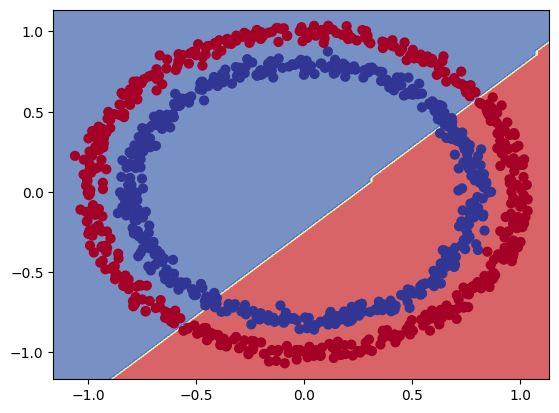

In [20]:
plot_decision_boundary(model_3, X, y)

In [21]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: ignored

In [22]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 304.2617 - mae: 304.2617
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 175.2523 - mae: 175.2523
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 62.9118 - mae: 62.9118
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 76.2024 - mae: 76.2024
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 78.3229 - mae: 78.3229
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 49.1128 - mae: 49.1128
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 47.3790 - mae: 47.3790
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 41.9553 - mae: 41.9553
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.4787 - mae: 43.4787
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.2144 - mae: 42.2144
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 5ms/step


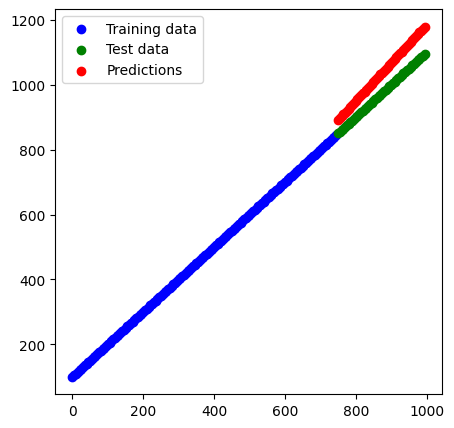

In [23]:
y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize=(5,5))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test data' )
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predictions')
plt.legend();

### Add a activation layer to our classification model.
1. Linear
2. relu
3. sigmoid (for output layer)

In [24]:
tf.random.set_seed(42)
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                metrics=['accuracy'])

history=model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.9588 - accuracy: 0.4940
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6965 - accuracy: 0.5080
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7091 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6958 - accuracy: 0.4920
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6993 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7007 - accuracy: 0.5060
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7006 - accuracy: 0.5030
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.4780
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5070
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4980
Epoch 11/

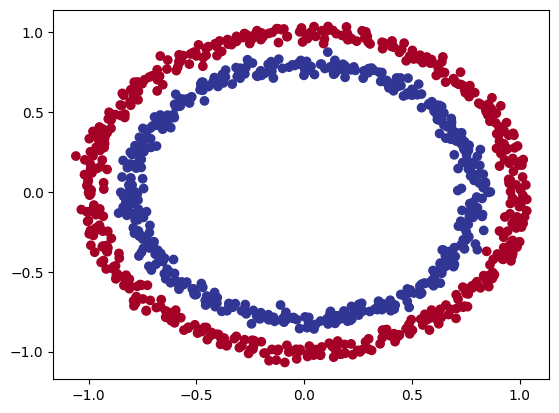

In [25]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


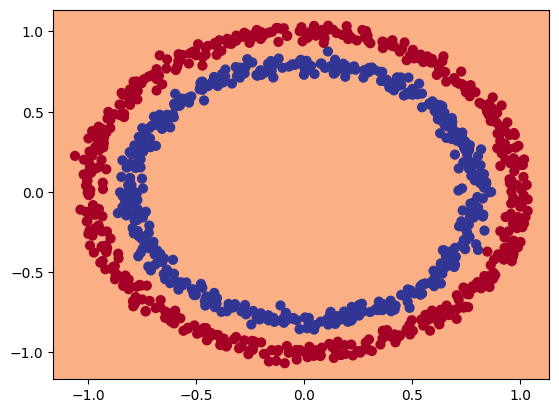

In [26]:
plot_decision_boundary(model_4, X, y)

In [27]:
tf.random.set_seed(42)
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history=model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.8148 - accuracy: 0.4910
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.4331 - accuracy: 0.4360
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3449 - accuracy: 0.4120
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2846 - accuracy: 0.4220
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2388 - accuracy: 0.4320
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2017 - accuracy: 0.4330
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1712 - accuracy: 0.4470
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1441 - accuracy: 0.4480
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1205 - accuracy: 0.4500
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0987 - accuracy: 0.4480
Epoch 11/

In [28]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history=model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.6984 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2738 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1294 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0325 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9590 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9023 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8613 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8311 - accuracy: 0.4790
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8092 - accuracy: 0.4210
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7924 - accuracy: 0.4000
Epoch 11/

In [29]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6065 - accuracy: 0.7580


[0.6065497994422913, 0.7580000162124634]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


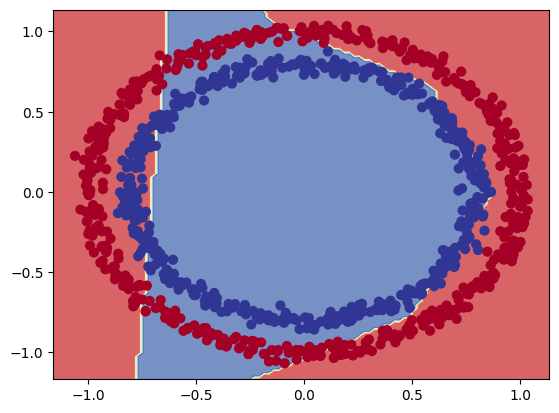

In [30]:
plot_decision_boundary(model_6, X, y)

In [31]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6988 - accuracy: 0.4850
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6890 - accuracy: 0.5040
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6842 - accuracy: 0.5320
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.5720
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6620 - accuracy: 0.6410
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6317 - accuracy: 0.6700
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5873 - accuracy: 0.7300
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5144 - accuracy: 0.8230
Epoch 11/

In [32]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0103 - accuracy: 0.9970


[0.010297726839780807, 0.996999979019165]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


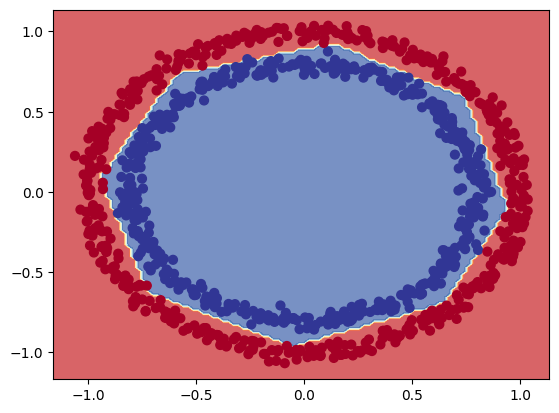

In [33]:
plot_decision_boundary(model_7, X, y)

### Activation functions

In [34]:
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

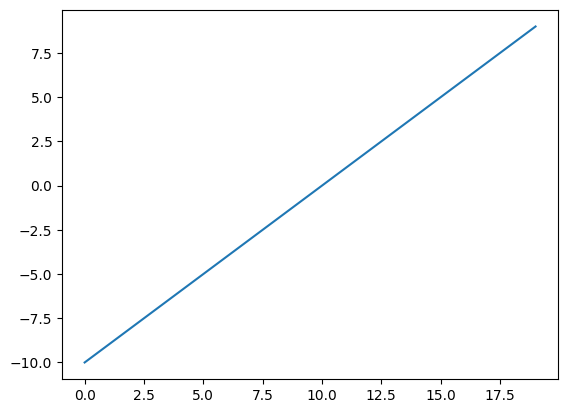

In [35]:
plt.plot(A)

#### 1. Sigmoid

In [36]:
def sigmoid(x):
  return 1 / (1+ tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

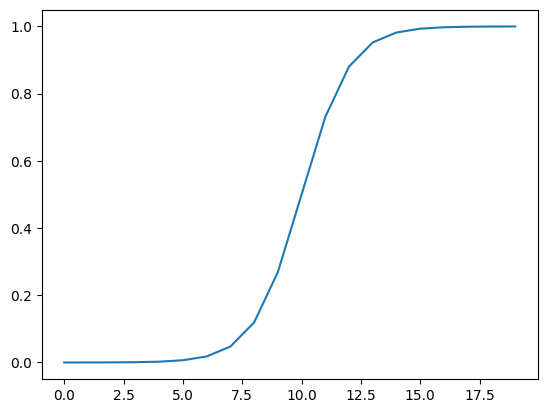

In [37]:
plt.plot(sigmoid(A));

#### 2. ReLU

In [38]:
def relu(x):
  return tf.maximum(0,x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

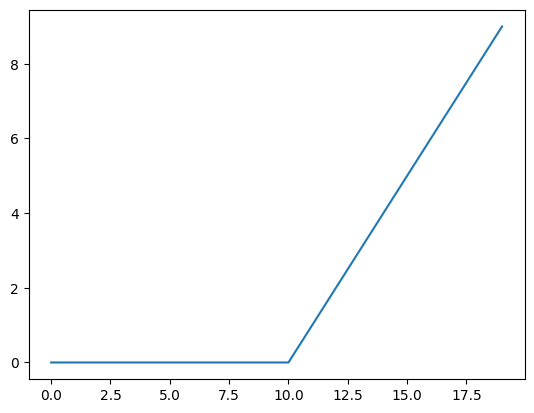

In [39]:
plt.plot(relu(A));

In [40]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

### Evaluating and improving classification model

In [41]:
# Splitting into train and test datasets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [51]:
tf.random.set_seed(42)

model_8= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

history_8 = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 3s 4ms/step - loss: 0.6918 - accuracy: 0.4812
Epoch 2/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6867 - accuracy: 0.5288
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6825 - accuracy: 0.5337
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6773 - accuracy: 0.5638
Epoch 5/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6708 - accuracy: 0.6125
Epoch 6/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6624 - accuracy: 0.5800
Epoch 7/25
25/25 [==============================] - 0s 11ms/step - loss: 0.6477 - accuracy: 0.6650
Epoch 8/25
25/25 [==============================] - 0s 10ms/step - loss: 0.6331 - accuracy: 0.6700
Epoch 9/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6092 - accuracy: 0.7663
Epoch 10/25
25/25 [==============================] - 0s 6ms/step - loss: 0.5729 - accuracy: 0.7337
Epoch 11/25
25/25

In [52]:
model_8.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (32, 4)                   12        
                                                                 
 dense_32 (Dense)            (32, 4)                   20        
                                                                 
 dense_33 (Dense)            (32, 1)                   5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [53]:
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0523 - accuracy: 0.9900
Model loss on the test set: 0.05226034298539162
Model accuracy on the test set: 99.00%


313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


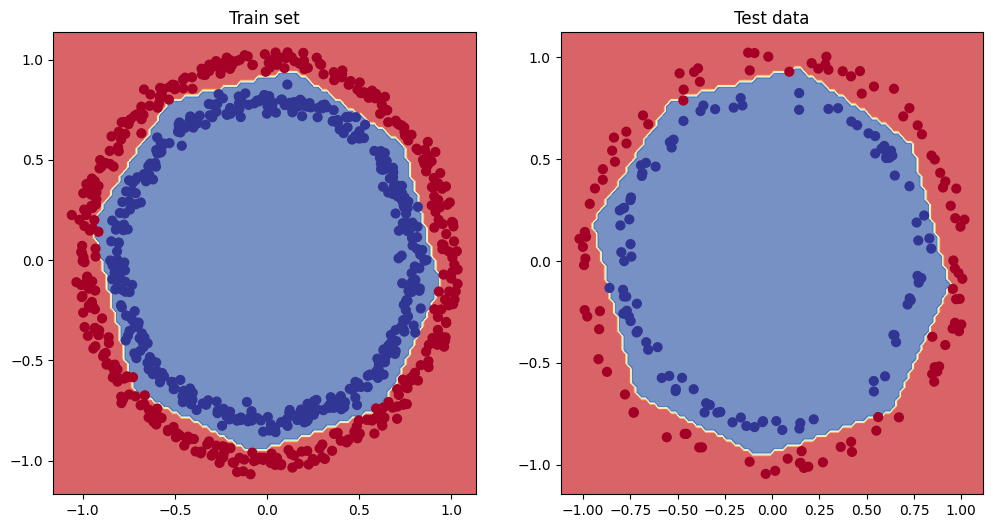

In [54]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train set")
plot_decision_boundary(model_8, X=X_train, y=y_train)

plt.subplot(1,2,2)
plt.title("Test data")
plot_decision_boundary(model_8, X=X_test, y=y_test)

### Plot the loss(training) curves

In [55]:
history_8.history

{'loss': [0.6918163299560547,
  0.6867437958717346,
  0.6825116872787476,
  0.6772749423980713,
  0.6707962155342102,
  0.662405252456665,
  0.6477473974227905,
  0.633132815361023,
  0.6091633439064026,
  0.572871208190918,
  0.5323998928070068,
  0.47171810269355774,
  0.3985954225063324,
  0.3146398067474365,
  0.23670481145381927,
  0.18023590743541718,
  0.14608334004878998,
  0.12142131477594376,
  0.10310279577970505,
  0.09694936126470566,
  0.08278113603591919,
  0.07431746274232864,
  0.06688346713781357,
  0.06331535428762436,
  0.056655384600162506],
 'accuracy': [0.48124998807907104,
  0.5287500023841858,
  0.5337499976158142,
  0.5637500286102295,
  0.612500011920929,
  0.5799999833106995,
  0.6650000214576721,
  0.6700000166893005,
  0.7662500143051147,
  0.7337499856948853,
  0.7950000166893005,
  0.8974999785423279,
  0.9312499761581421,
  0.9837499856948853,
  0.9850000143051147,
  0.9925000071525574,
  0.9962499737739563,
  0.9962499737739563,
  0.9950000047683716,
 

In [56]:
pd.DataFrame(history_8.history)

,loss,accuracy
0,0.691816,0.48125
1,0.686744,0.52875
2,0.682512,0.53375
3,0.677275,0.56375
4,0.670796,0.61250
5,0.662405,0.58000
6,0.647747,0.66500
7,0.633133,0.67000
8,0.609163,0.76625
9,0.572871,0.73375


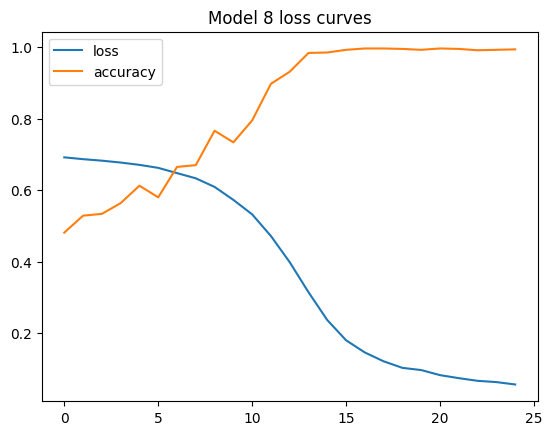

In [57]:
pd.DataFrame(history_8.history).plot()
plt.title("Model 8 loss curves");

### Finding the best learning rate
Decide the best number for the model.


In [58]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_9.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

#create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

history_9 = model_9.fit(X_train, y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7363 - accuracy: 0.4762 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7351 - accuracy: 0.4812 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7339 - accuracy: 0.4837 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7325 - accuracy: 0.4850 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7310 - accuracy: 0.4863 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7295 - accuracy: 0.4863 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7278 - accuracy: 0.4875 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7262 - accuracy: 0.4888 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

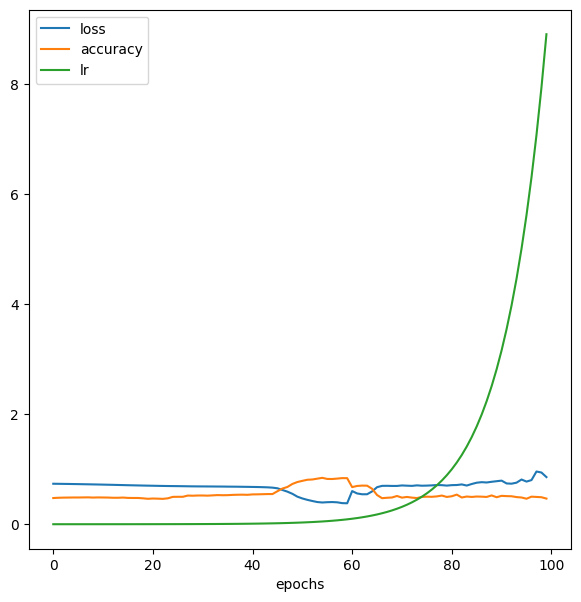

In [59]:
pd.DataFrame(history_9.history).plot(figsize=(7,7), xlabel="epochs");

In [60]:
### PLot learning rate vs. loss
lrs=1e-4*(10**(tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

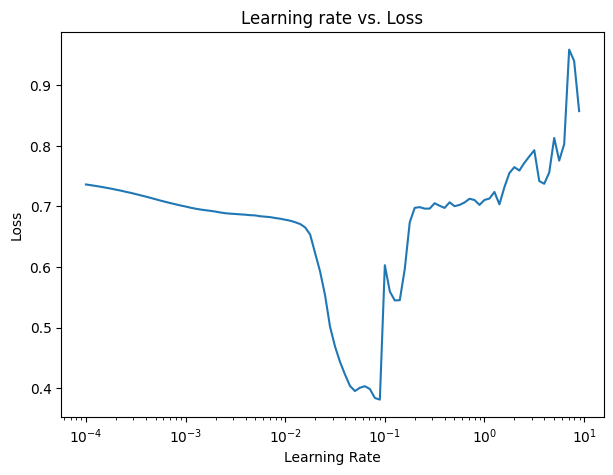

In [65]:
plt.figure(figsize=(7,5))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning rate vs. Loss');

In [72]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=['accuracy'])

history_10 = model_10.fit(X_train, y_train,
                        epochs=20)

Epoch 1/20
25/25 [==============================] - 2s 3ms/step - loss: 0.6923 - accuracy: 0.4925
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6821 - accuracy: 0.5425
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6708 - accuracy: 0.5775
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6612 - accuracy: 0.5925
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6500 - accuracy: 0.6175
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6393 - accuracy: 0.5962
Epoch 7/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6281 - accuracy: 0.6275
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6055 - accuracy: 0.6687
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5643 - accuracy: 0.7287
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5029 - accuracy: 0.8150
Epoch 11/20
25/25 [

In [73]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0880 - accuracy: 0.9950


[0.0879574790596962, 0.9950000047683716]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


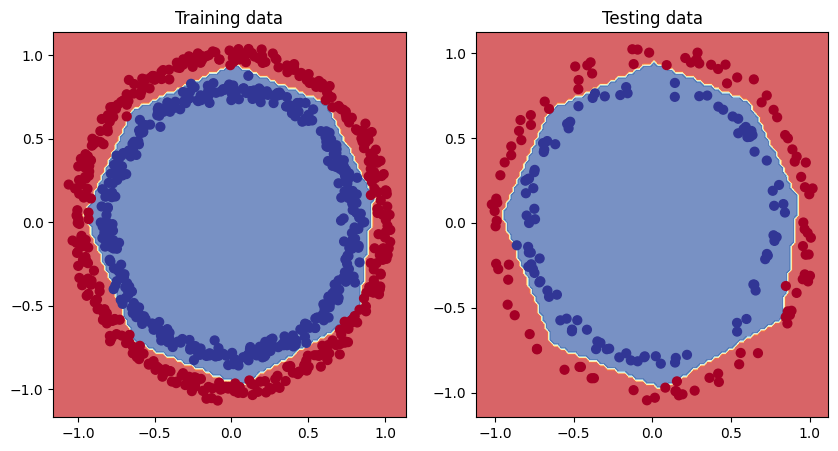

In [74]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Training data")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Testing data")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

In [75]:
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0880 - accuracy: 0.9950
Model loss on test set: 0.0879574790596962
Model accuracy on test set: 99.50%


In [79]:
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [80]:
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [81]:
confusion_matrix(y_test, tf.round(y_preds))

array([[100,   1],
       [  0,  99]])